In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
from pathlib import Path
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Studies/Self_Study/Youtube/Data_Science_Lovers/Pizza_sales/Pizza_Sales.csv')

In [ ]:
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/15,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/15,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/15,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/15,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/15,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,12/31/15,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,12/31/15,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,12/31/15,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,12/31/15,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [ ]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [ ]:
df.columns.nunique()

12

In [ ]:
df['order_details_id'].nunique()

48620

In [ ]:
df.shape

(48620, 12)

In [ ]:
df['order_id'].nunique()

21350

In [ ]:
df['pizza_id'].nunique()

91

In [ ]:
df['quantity'].unique()

array([1, 2, 3, 4])

In [ ]:
# 1. Check for duplicate records

duplicates = df.duplicated().sum()
duplicates

'''if duplicates are there  -----   df = df.drop_duplicates()'''

'if duplicates are there  -----   df = df.drop_duplicates()'

In [ ]:
#2. Check for missing values in critical columns

null_values = df.isnull().sum()
null_values

''' If missing values then drop or impute it with mean and median'''

''' dropna or fillna'''

' dropna or fillna'

In [ ]:
# 3. Verify if total_price = quantity * unit_price
incorrect_prices = df[df['quantity'] * df['unit_price'] != df['total_price']]
incorrect_prices.shape[0]

0

In [ ]:
# 4. Standardize pizza_size values

pizza_size_unique = df['pizza_size'].unique()
pizza_size_unique

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [ ]:
# 5. data types
df.dtypes

,0
order_details_id,int64
order_id,int64
pizza_id,object
quantity,int64
order_date,object
order_time,object
unit_price,float64
total_price,float64
pizza_size,object
pizza_category,object


In [ ]:
# 5.
df['order_timestamp'] = pd.to_datetime(df['order_date'] + ' ' + df['order_time'])


<ipython-input-16-22889c21ac72>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_timestamp'] = pd.to_datetime(df['order_date'] + ' ' + df['order_time'])


In [ ]:
df.dtypes

,0
order_details_id,int64
order_id,int64
pizza_id,object
quantity,int64
order_date,object
order_time,object
unit_price,float64
total_price,float64
pizza_size,object
pizza_category,object


In [ ]:
df['order_timestamp']

,order_timestamp
0,2015-01-01 11:38:36
1,2015-01-01 11:57:40
2,2015-01-01 11:57:40
3,2015-01-01 11:57:40
4,2015-01-01 11:57:40
...,...
48615,2015-12-31 21:23:10
48616,2015-12-31 21:23:10
48617,2015-12-31 21:23:10
48618,2015-12-31 22:09:54


In [ ]:
df['pizza_name'].unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

In [ ]:
df['pizza_name'].nunique()

32

In [ ]:
df['pizza_category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [ ]:
df['pizza_category'].nunique()

4

In [ ]:
# 6. Top 5 best-selling pizzas by quantity

top5_pizza = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending = False).head(5).reset_index()
top5_pizza

,pizza_name,quantity
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422
3,The Pepperoni Pizza,2418
4,The Thai Chicken Pizza,2371


<Axes: >

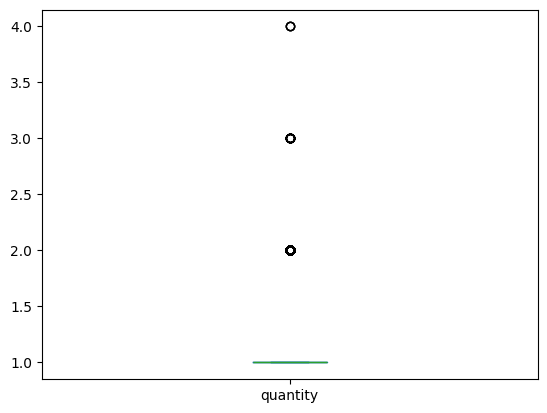

In [ ]:
# 7. Distribution of order quantities & outliers

df['quantity'].describe()
df['quantity'].plot(kind='box')

In [ ]:
# 8. Variation of total_price by pizza_category

price_pizza_category = df.groupby('pizza_category')['total_price'].mean().reset_index()
price_pizza_category

,pizza_category,total_price
0,Chicken,18.115534
1,Classic,15.093840
2,Supreme,17.678271
3,Veggie,16.917674


In [ ]:
# 8.1 Variation of unit_price by pizza_category

unit_price_category = df.groupby('pizza_category')['unit_price'].mean().reset_index()
unit_price_category

,pizza_category,unit_price
0,Chicken,17.709408
1,Classic,14.797490
2,Supreme,17.363229
3,Veggie,16.612639


<Axes: xlabel='pizza_category', ylabel='total_price'>

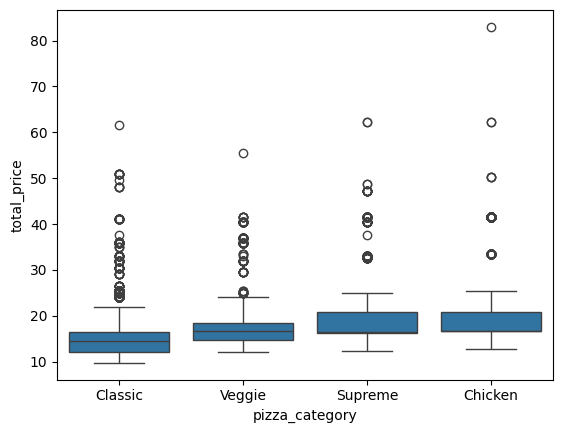

In [ ]:
sns.boxplot(x='pizza_category', y='total_price', data=df)

In [ ]:
# 9. Average order value per order

avg_order = df.groupby('order_id')['total_price'].sum().mean()
avg_order

38.30726229508196

<Axes: xlabel='hour'>

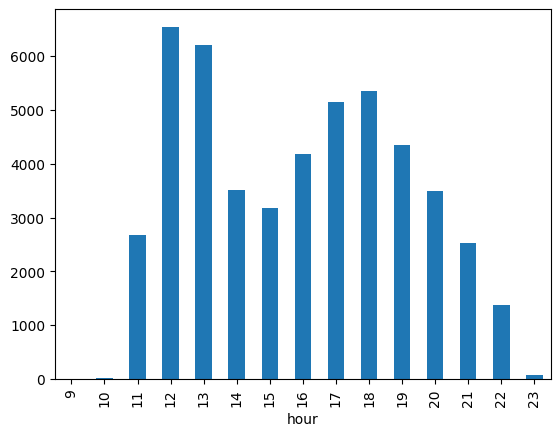

In [ ]:
# 10. Peak hours for pizza orders

df['hour'] = df['order_timestamp'].dt.hour
df['hour'].value_counts().sort_index().plot(kind='bar')

In [ ]:
# 11. Pizza category generating the highest revenue

category_revenue = df.groupby('pizza_category')['total_price'].sum().reset_index()
category_revenue

,pizza_category,total_price
0,Chicken,195919.50
1,Classic,220053.10
2,Supreme,208197.00
3,Veggie,193690.45


<Axes: xlabel='pizza_size'>

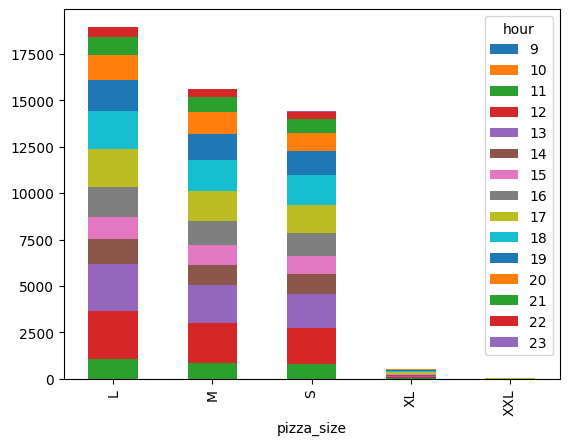

In [ ]:
# 12. Popular pizza sizes at different times of the day

pizza_size_day_time = df.groupby(['pizza_size', 'hour'])['quantity'].sum().unstack().plot(kind='bar', stacked=True)
pizza_size_day_time

In [ ]:
# 13. Average number of pizzas per order

avg_pizza_per_order = df.groupby('order_id')['quantity'].sum().mean()
avg_pizza_per_order

2.321967213114754

In [ ]:
# 14. Top 3 most expensive pizzas & their frequency

top_3_expensive = df.groupby('pizza_name')['unit_price'].max().sort_values(ascending=False).head(3)
top_3_expensive

,unit_price
pizza_name,
The Greek Pizza,35.95
The Brie Carre Pizza,23.65
The Italian Vegetables Pizza,21.00


In [ ]:
#15. Effect of ingredients on sales
df['num_ingredients'] = df['pizza_ingredients'].str.count(',') + 1

In [ ]:
#16. Repeat purchases of specific pizzas

repeat_pizza = df.groupby(['order_id', 'pizza_name']).size().reset_index().groupby('pizza_name').size().sort_values(ascending=False).reset_index()
repeat_pizza

,pizza_name,0
0,The Classic Deluxe Pizza,2329
1,The Hawaiian Pizza,2280
2,The Pepperoni Pizza,2278
3,The Barbecue Chicken Pizza,2273
4,The Thai Chicken Pizza,2225
5,The California Chicken Pizza,2197
6,The Southwest Chicken Pizza,1825
7,The Spicy Italian Pizza,1822
8,The Sicilian Pizza,1820
9,The Big Meat Pizza,1811


<Axes: xlabel='weekday'>

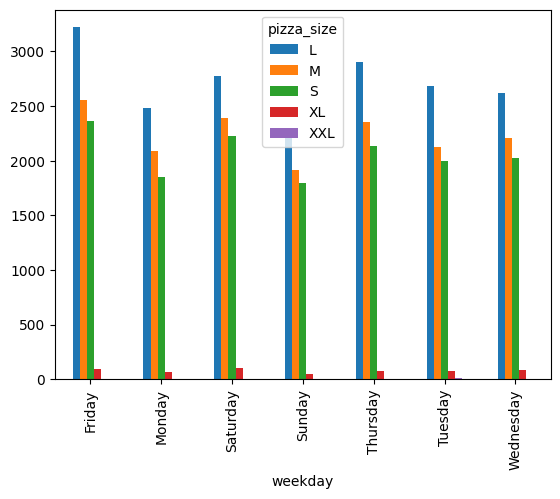

In [ ]:
# 17. Pizza sizes ordered more on weekends vs. weekdays

df['weekday'] = df['order_timestamp'].dt.day_name()
weekend_vs_weekdays = df.groupby(['weekday', 'pizza_size'])['quantity'].sum().unstack().plot(kind='bar')
weekend_vs_weekdays

<Axes: xlabel='pizza_size'>

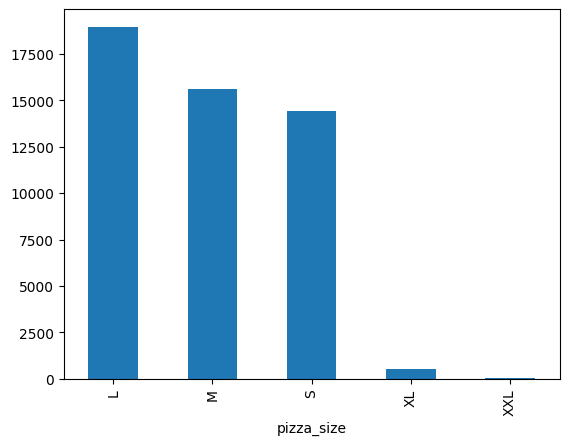

In [ ]:
pizza_size_viz = df.groupby('pizza_size')['quantity'].sum().plot(kind='bar')
pizza_size_viz

# how many pizzas were sold for each sizein total

In [ ]:
# 18. Percentage of small, medium, and large pizzas sold
percentage_size = df['pizza_size'].value_counts(normalize = True) * 100
percentage_size

,proportion
pizza_size,
L,38.103661
M,31.643357
S,29.076512
XL,1.118881
XXL,0.057589


In [ ]:
#19. Frequently ordered pizza combinations

from itertools import combinations
from collections import Counter

combo_counter = Counter()
for order in df.groupby('order_id')['pizza_name'].apply(list):
    combo_counter.update(combinations(order, 2))

combo_counter.most_common(5)

[(('The Hawaiian Pizza', 'The Thai Chicken Pizza'), 319),
 (('The Barbecue Chicken Pizza', 'The Pepperoni Pizza'), 308),
 (('The Pepperoni Pizza', 'The Thai Chicken Pizza'), 299),
 (('The Hawaiian Pizza', 'The Pepperoni Pizza'), 299),
 (('The Classic Deluxe Pizza', 'The Hawaiian Pizza'), 296)]

In [ ]:
# 20. Order quantity variation between lunch and dinner
df['time_of_day'] = pd.cut(df['hour'], bins = [0, 6, 12, 18, 24], labels = ['Midnight', 'Morning', 'Afternoon', 'Night'])
quantity_lunch_dinner = df.groupby('time_of_day')['quantity'].sum().reset_index()
quantity_lunch_dinner

<ipython-input-40-b57c7eedd6ab>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_lunch_dinner = df.groupby('time_of_day')['quantity'].sum().reset_index()


,time_of_day,quantity
0,Midnight,0
1,Morning,9526
2,Afternoon,28109
3,Night,11939


In [ ]:
# 21. Total revenue over the last 3 months

revenue_last3 = df[df['order_timestamp'] >= '2015-12-01']['total_price'].sum()
revenue_last3

64701.15

In [ ]:
# a better approach
latest_date = df['order_timestamp'].max()
three_months_ago = latest_date - pd.DateOffset(months = 3)
revenue_last3 = df[df['order_timestamp'] >= three_months_ago]['total_price'].sum()
revenue_last3

199124.09999999998

In [ ]:
# 22. Average unit price per category

avg_unit_price_category = df.groupby('pizza_category')['unit_price'].mean().reset_index()
avg_unit_price_category

,pizza_category,unit_price
0,Chicken,17.709408
1,Classic,14.797490
2,Supreme,17.363229
3,Veggie,16.612639


In [ ]:
# 24. Revenue fluctuation over the week
revenue_weekly = df.groupby('weekday')['total_price'].sum()
revenue_weekly

,total_price
weekday,
Friday,136073.90
Monday,107329.55
Saturday,123182.40
Sunday,99203.50
Thursday,123528.50
Tuesday,114133.80
Wednesday,114408.40


<Axes: xlabel='order_timestamp'>

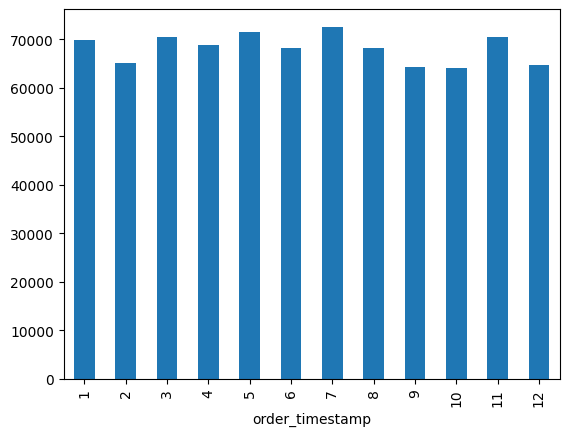

In [ ]:
# 25. Seasonal trends in sales
seasonal_sales = df.groupby(df['order_timestamp'].dt.month)['total_price'].sum().plot(kind='bar')
seasonal_sales

In [ ]:
# 28. Correlation between quantity and unit_price
corr_quant_unitprice = df[['quantity', 'unit_price']].corr()
corr_quant_unitprice

,quantity,unit_price
quantity,1.000000,0.007142
unit_price,0.007142,1.000000


In [ ]:
# 29. Skewness in total_price distribution
skewness = df['total_price'].skew()
skewness

1.7328564007150937

In [ ]:
# 30. Probability of an order having more than 3 pizzas

prob_3 = (df.groupby('order_id')['quantity'].sum()>3).mean()
prob_3

0.18173302107728337

# 50 questions

In [ ]:
#1. Convert order_date to datetime and set it as index:

# df['order_date'] = pd.to_datetime(df['order_date'])

df['order_date'] = pd.to_datetime(df['order_date'])

<ipython-input-49-726afd0e43db>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


In [ ]:
#2. Filter dataset for orders with total price greater than $50:

price_above_50 = (df['total_price'] > 50).sum()
price_above_50

18

In [ ]:
# 4. Extract month and year from order_date

df['order_month'] = df['order_timestamp'].dt.month
df['order_year'] = df['order_timestamp'].dt.year

In [ ]:
# 5. Group by pizza_name and calculate the average quantity sold:

pizza_avg_quantity = df.groupby('pizza_name')['quantity'].mean().reset_index()
pizza_avg_quantity

,pizza_name,quantity
0,The Barbecue Chicken Pizza,1.025295
1,The Big Meat Pizza,1.056875
2,The Brie Carre Pizza,1.020833
3,The Calabrese Pizza,1.010787
4,The California Chicken Pizza,1.029540
5,The Chicken Alfredo Pizza,1.007143
6,The Chicken Pesto Pizza,1.012487
7,The Classic Deluxe Pizza,1.015315
8,The Five Cheese Pizza,1.036792
9,The Four Cheese Pizza,1.028108


In [ ]:
# 6. Sort by total_price in descending order

df['total_price'].sort_values(ascending=False)

,total_price
35496,83.00
38819,62.25
37638,62.25
18317,62.25
183,62.25
...,...
1642,9.75
24146,9.75
42892,9.75
28607,9.75


In [ ]:
# 7. Create a new column order_weekday

df['order_weekday'] = df['order_date'].dt.day_name()
df['order_weekday']

,order_weekday
0,Thursday
1,Thursday
2,Thursday
3,Thursday
4,Thursday
...,...
48615,Thursday
48616,Thursday
48617,Thursday
48618,Thursday


In [ ]:
# 8. Remove rows with missing pizza_id or order_id:
df.isnull().sum()

# df.dropna(['pizza_id', 'order_id'])

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
# 10. Remove duplicate entries based on order_id:

df.duplicated().sum()
df.drop_duplicates(subset='order_id')

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_timestamp,hour,num_ingredients,weekday,time_of_day,order_month,order_year,order_weekday
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01-01 11:38:36,11,3,Thursday,Morning,1,2015,Thursday
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01-01 11:57:40,11,5,Thursday,Morning,1,2015,Thursday
6,7,3,ital_supr_m,1,2015-01-01,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:12:28,12,6,Thursday,Morning,1,2015,Thursday
8,9,4,ital_supr_m,1,2015-01-01,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:16:31,12,6,Thursday,Morning,1,2015,Thursday
9,10,5,ital_supr_m,1,2015-01-01,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01-01 12:21:30,12,6,Thursday,Morning,1,2015,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48607,48608,21346,big_meat_s,1,2015-12-31,20:51:07,12.00,12.00,S,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",The Big Meat Pizza,2015-12-31 20:51:07,20,4,Thursday,Night,12,2015,Thursday
48611,48612,21347,bbq_ckn_m,1,2015-12-31,21:14:37,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,2015-12-31 21:14:37,21,6,Thursday,Night,12,2015,Thursday
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015-12-31 21:23:10,21,6,Thursday,Night,12,2015,Thursday
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-12-31 22:09:54,22,8,Thursday,Night,12,2015,Thursday


In [ ]:
# 11. Calculate total revenue per pizza_category:

df.groupby('pizza_category')['total_price'].sum()

,total_price
pizza_category,
Chicken,195919.50
Classic,220053.10
Supreme,208197.00
Veggie,193690.45


In [ ]:
# 13. Group by order_date and calculate total quantity each day
df.groupby(['order_date', 'weekday'])['quantity'].sum()

,,quantity
order_date,weekday,
2015-01-01,Thursday,162
2015-01-02,Friday,165
2015-01-03,Saturday,158
2015-01-04,Sunday,106
2015-01-05,Monday,125
...,...,...
2015-12-27,Sunday,89
2015-12-28,Monday,102
2015-12-29,Tuesday,80


In [ ]:
df.groupby(df['order_date'].dt.date)['quantity'].sum()

,quantity
order_date,
2015-01-01,162
2015-01-02,165
2015-01-03,158
2015-01-04,106
2015-01-05,125
...,...
2015-12-27,89
2015-12-28,102
2015-12-29,80


In [ ]:
total_quantity_per_day = df.groupby(df['order_date'].dt.date)['quantity'].sum()
total_quantity_per_day

,quantity
order_date,
2015-01-01,162
2015-01-02,165
2015-01-03,158
2015-01-04,106
2015-01-05,125
...,...
2015-12-27,89
2015-12-28,102
2015-12-29,80


In [ ]:
#14.Find most sold pizza for each pizza_size:

df.groupby('pizza_size')['quantity'].sum().reset_index()

,pizza_size,quantity
0,L,18956
1,M,15635
2,S,14403
3,XL,552
4,XXL,28


In [ ]:
#15.Calculate total sales by day of the week:

total_weekly_sales = df.groupby('weekday')['total_price'].sum().reset_index()
total_weekly_sales

,weekday,total_price
0,Friday,136073.90
1,Monday,107329.55
2,Saturday,123182.40
3,Sunday,99203.50
4,Thursday,123528.50
5,Tuesday,114133.80
6,Wednesday,114408.40


In [ ]:
# 16.Find pizza with the highest quantity sold in each pizza_category
df.groupby('pizza_category')['quantity'].idxmax()

,quantity
pizza_category,
Chicken,35496
Classic,11976
Supreme,183
Veggie,41558


In [ ]:
# 17. Calculate total sales per order_id:

df.groupby('order_id')['quantity'].sum().sort_values(ascending=False).head(10)

,quantity
order_id,
18845,28
10760,25
18513,15
21158,15
20163,15
17464,15
20839,15
2075,15
1685,15


In [ ]:
# 18. Create a pivot table to summarize sales by pizza_category and pizza_name:
pivot_table = pd.pivot_table(df, values = 'total_price', index = 'pizza_category', columns='pizza_name', aggfunc='sum')
pivot_table

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
pizza_category,,,,,,,,,,,,,,,,,,,,,
Chicken,42768.0,NaN,NaN,NaN,41409.5,16900.25,16701.75,NaN,NaN,NaN,...,NaN,NaN,NaN,34705.75,NaN,NaN,NaN,NaN,43434.25,NaN
Classic,NaN,22968.0,NaN,NaN,NaN,NaN,NaN,38180.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supreme,NaN,NaN,11588.5,15934.25,NaN,NaN,NaN,NaN,NaN,NaN,...,24193.25,30940.5,16425.75,NaN,34831.25,NaN,15277.75,NaN,NaN,NaN
Veggie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26066.5,32265.7,...,NaN,NaN,NaN,NaN,NaN,15596.0,NaN,23271.25,NaN,24374.75


In [ ]:
# 19. Calculate average unit_price for each pizza_ingredients:
df.groupby('pizza_ingredients')['unit_price'].mean().sort_values(ascending=False).reset_index()

,pizza_ingredients,unit_price
0,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.650000
1,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",20.035633
2,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.500000
3,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",18.286069
4,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",18.104663
5,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",18.080504
6,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",18.024038
7,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",17.769740
8,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",17.637834
9,"Barbecued Chicken, Red Peppers, Green Peppers,...",17.572934


In [ ]:
# 20. Calculate total revenue for each order_time:
df.groupby('hour')['total_price'].sum()

,total_price
hour,
9,83.00
10,303.65
11,44935.80
12,111877.90
13,106065.70
14,59201.40
15,52992.30
16,70055.40
17,86237.45


In [ ]:
# 22. Display top 10 most expensive pizzas by unit_price:
df.groupby('pizza_name')['unit_price'].max().sort_values(ascending=False).head(10).reset_index()

,pizza_name,unit_price
0,The Greek Pizza,35.95
1,The Brie Carre Pizza,23.65
2,The Italian Vegetables Pizza,21.00
3,The Prosciutto and Arugula Pizza,20.75
4,The Pepper Salami Pizza,20.75
5,The Soppressata Pizza,20.75
6,The Southwest Chicken Pizza,20.75
7,The Italian Supreme Pizza,20.75
8,The Spicy Italian Pizza,20.75
9,The Spinach Pesto Pizza,20.75


In [ ]:
top_expensive_pizzas = df[['pizza_name', 'unit_price']].drop_duplicates().nlargest(10, 'unit_price')
top_expensive_pizzas

,pizza_name,unit_price
3447,The Greek Pizza,35.95
121,The Greek Pizza,25.50
427,The Brie Carre Pizza,23.65
175,The Italian Vegetables Pizza,21.00
3,The Italian Supreme Pizza,20.75
5,The Thai Chicken Pizza,20.75
7,The Prosciutto and Arugula Pizza,20.75
20,The Spicy Italian Pizza,20.75
21,The Spinach Pesto Pizza,20.75
24,The Southwest Chicken Pizza,20.75


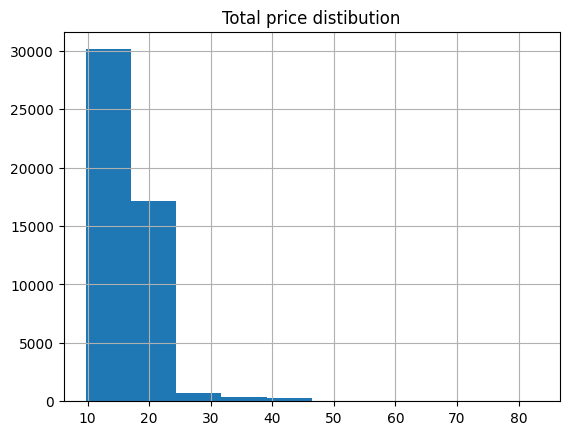

In [ ]:
# 23. Visualize the distribution of total_price with a histogram:

df['total_price'].hist(bins=10)
plt.title('Total price distibution')
plt.show()

In [ ]:
# 24. Visualize the relationship between quantity and unit_price:

corr_quant_unitprice1 = df[['quantity', 'unit_price']].corr()
corr_quant_unitprice1

,quantity,unit_price
quantity,1.000000,0.007142
unit_price,0.007142,1.000000


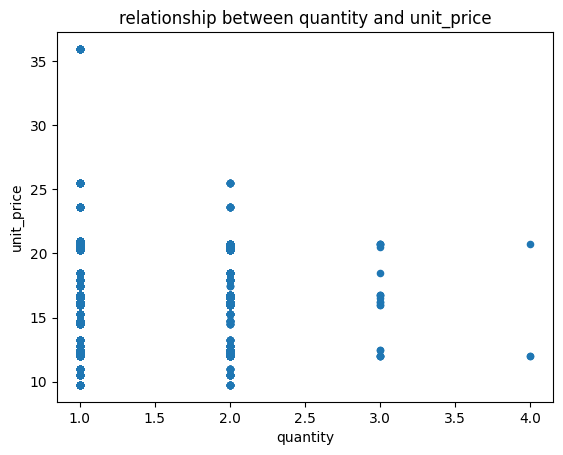

In [ ]:
df.plot.scatter(x = 'quantity', y = 'unit_price')
plt.title('relationship between quantity and unit_price')
plt.show()

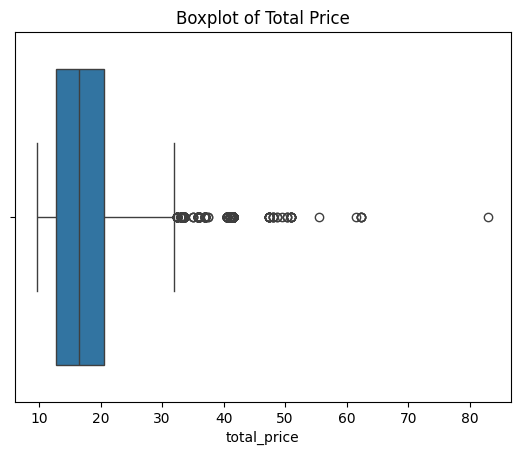

In [ ]:
# 25. Use a boxplot to identify outliers in total_price:
sns.boxplot(x=df['total_price'])
plt.title('Boxplot of Total Price')
plt.show()

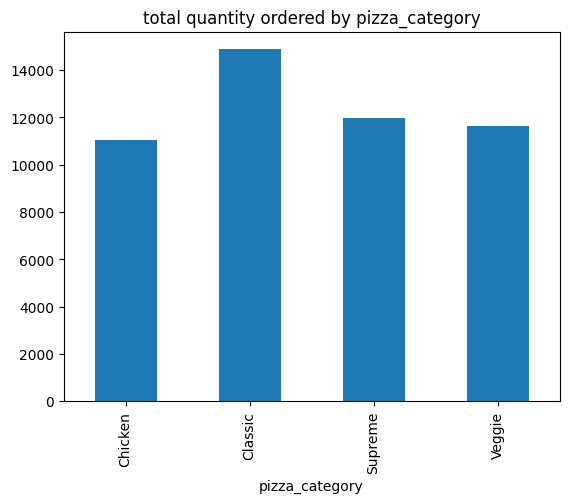

In [ ]:
# 26. Plot total quantity ordered by pizza_category using a bar chart:
pizza_category_quantity = df.groupby('pizza_category')['quantity'].sum()

pizza_category_quantity.plot(kind='bar')
plt.title('total quantity ordered by pizza_category')
plt.show()

In [ ]:
# 27. Calculate the percentage of each pizza_category in total sales:
